In [26]:
import thinkdsp
from thinkdsp import CosSignal, SinSignal, SquareSignal, SawtoothSignal, ParabolicSignal, CubicSignal, TriangleSignal, GlottalSignal, Sinusoid, decorate, normalize, unbias
from scipy.signal import quadratic
import matplotlib.pyplot as plt
import numpy as np

In [27]:
class QuadraticSignal(Sinusoid):
    """Represents a quadratic signal."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / (np.pi * 2)
        frac, _ = np.modf(cycles)
        ys = quadratic(frac - 0.5)
        ys = normalize(unbias(ys), self.amp)
        return ys

In [40]:
from thinkdsp import read_wave

wave = read_wave('A.wav')

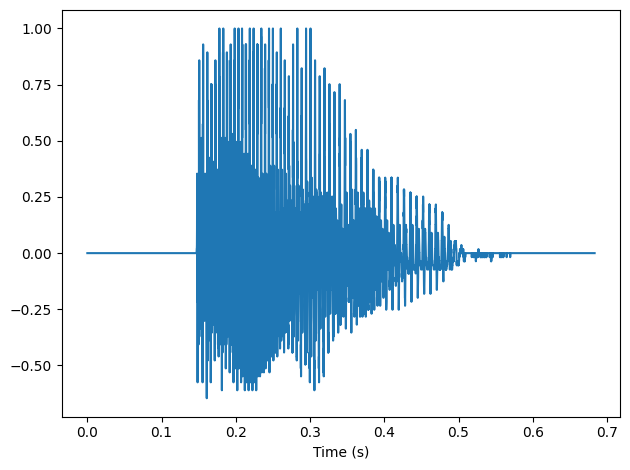

In [41]:
segment = wave.segment()
segment.plot()
decorate(xlabel='Time (s)')

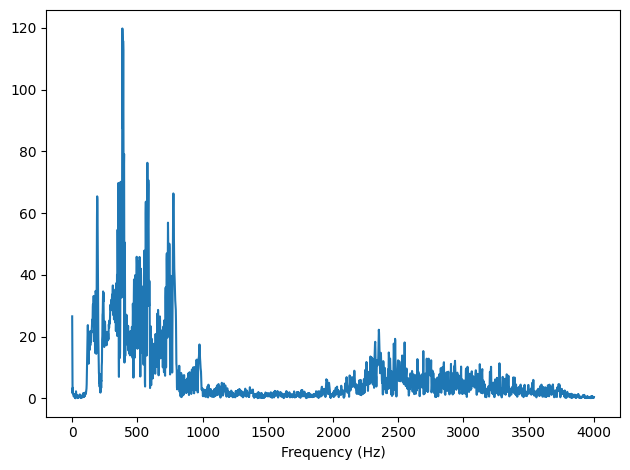

In [43]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

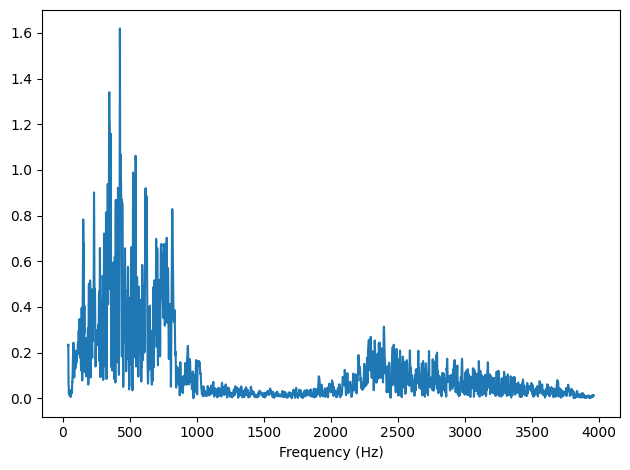

In [109]:
N = 55
new_spectrum = thinkdsp.Spectrum(np.convolve(spectrum.hs, np.ones(N) / N, mode='valid'), spectrum.fs[(N - 1) // 2: -(N // 2)], spectrum.framerate)

new_spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

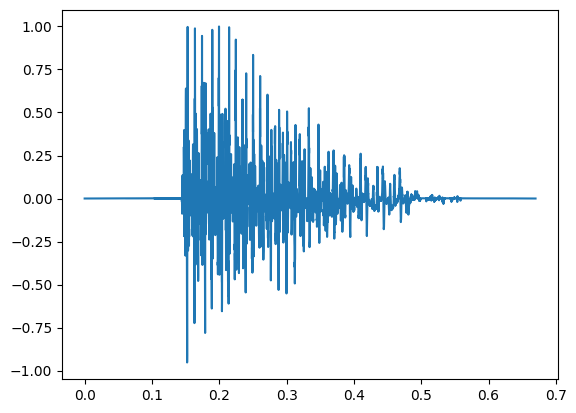

In [110]:
new_segment = new_spectrum.make_wave()
new_segment.normalize()
new_segment.apodize()
new_segment.plot()

In [108]:
new_segment.make_audio()